In [19]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [44]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,24223,None,None,88462.885954
2020-06-13,24224,None,None,81717.147223
2020-06-14,24225,None,None,75483.237432
2020-06-15,24226,None,None,69779.662094
2020-06-16,24227,None,None,64780.314704
...,...,...,...,...
2021-01-12,24437,None,None,806991.386502
2021-01-13,24438,None,None,801158.938585
2021-01-14,24439,None,None,791149.945549


In [45]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-16_2021-01-16-16-46.pickle


In [46]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-15_2021-01-15-16-46.pickle


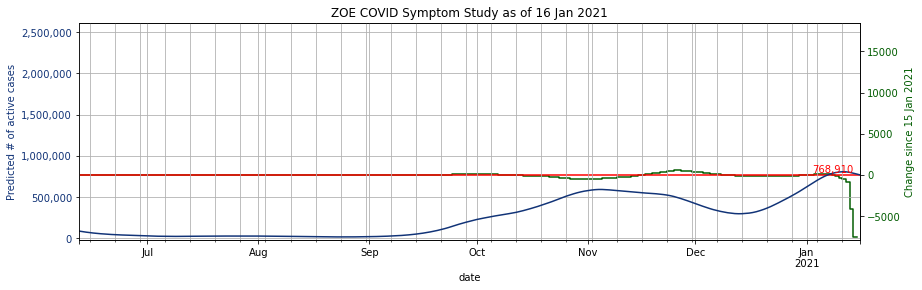

In [47]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

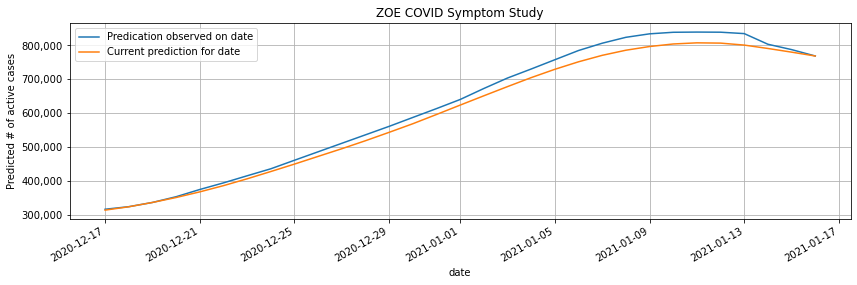

In [48]:
plot_study_evolution(curr_date, days=30)

In [49]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [50]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-01-16_2021-01-16-16-46.pickle


In [51]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
262,Worcester,E07000237,4.638432
368,Merton,E09000024,3.667896
124,Harlow,E07000073,3.282989
1,Middlesbrough,E06000002,3.073922
344,Cardiff,W06000015,2.948235
342,Bridgend,W06000013,2.866885
390,Dundee City,S12000042,2.828025
384,Torfaen,W06000020,2.684912
378,Sutton,E09000029,2.630394
369,Newham,E09000025,2.599944
